In [28]:
import numpy as np
from PIL import Image, ImageFilter, ImageDraw
import PIL.ImageOps
from matplotlib import pyplot as plt


# Onw Version of the image preparation

<class 'PIL.Image.Image'>
(296, 322)
(20, 20)
<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=L size=20x20 at 0x1164C0340>
<class 'numpy.ndarray'>
[[253. 255. 196. 120. 119. 126. 143. 152. 160. 167. 179. 186. 187. 187.
  191. 198. 208. 233. 255. 255.]
 [255. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0. 115. 254.]
 [254. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0. 244.]
 [254. 255. 255. 238. 246. 233. 204. 193. 185. 167. 147. 137. 135. 158.
  143.   0.   1.   0.  72. 254.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  117.   0.   0.  13. 255. 253.]
 [255. 255. 253. 250. 250. 250. 248. 248. 248. 249. 249. 243. 255. 235.
    0.   0.   0. 255. 255. 253.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 254. 255. 255.  11.
    0.   0. 102. 255. 252. 255.]
 [255. 255. 255. 255. 255. 255. 255. 253. 255. 255. 255. 255. 209.   0.
    0.   1. 255. 255. 255. 255.]
 [255. 

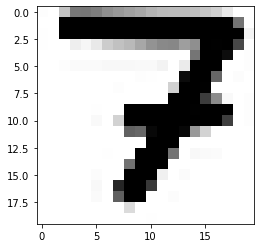

In [41]:
# https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
im = Image.open('IMG7.png')
# BANDS

# An image can consist of one or more bands of data. 
# The Python Imaging Library allows you to store several 
# bands in a single image, provided they all have the same 
# dimensions and depth. For example, a PNG image might have ‘R’, ‘G’, ‘B’, and ‘A’ 
# bands for the red, green, blue, and alpha transparency values. Many operations act 
# on each band separately, e.g., histograms. It is often useful to think of each 
# pixel as having one value per band.


im.getbands() # red, green, blue

im = im.convert('L') # mode = L –>  (8-bit pixels, black and white)
# The mode of an image is a string which defines 
# the type and depth of a pixel in the image. 
# Each pixel uses the full range of the bit depth. 
# So a 1-bit pixel has a range of 0-1, an 8-bit pixel 
# has a range of 0-255 and so on. 

im.getbands() # ('L',)

print(type(im)) # <class 'PIL.Image.Image'>

print(im.size) # im[0]->width , im[1]--> height im.size = (296, 322)

im = im.resize((20,20), Image.LANCZOS) # lancos is new name for antialias and is a filter used when resizing
# the picture
im = im.filter(ImageFilter.SHARPEN) # image enhancement filter (can also be left out)
# https://pillow.readthedocs.io/en/5.1.x/reference/ImageFilter.html
print(im.size)

print(type(im))

print(im)

test = np.array(im, dtype='float32')

print(type(test))

print(test)

plt.imshow(test, cmap='gray') 
# plot will appear at the end of the output

# picture has to be inverted because the digits
# from MNIST are white written on a black canvas. Also the digit is not centered now.
# that is what reshape 20 was used for in the other code. it resized the image to
# 20 by 20 pixels to then be able to paste it on the 28 by 28 empty canvas.
# then the picture has a 4 pixel distance to each side of the canvas.
#plt.show()

#print(type(im))

newImage = Image.new('L', (28, 28), (255)) 
# create new white (255) 
# (black if color is omitted or 0) image. Mode is L
# so the color must be a single integer or floar value
# https://www.geeksforgeeks.org/python-pil-image-new-method/
# https://pillow.readthedocs.io/en/stable/reference/ImageColor.html
# newImage.show()

newImage.paste(im,(4,4)) # the distance from the height and width of the upper left corner
# https://note.nkmk.me/en/python-pillow-paste/
# newImage.show()

inverted_image = PIL.ImageOps.invert(newImage)# invert the color of the image.
# https://stackoverflow.com/questions/2498875/how-to-invert-colors-of-image-with-pil-python-imaging
# before 0 was black and 1 was white, now it is the other way around
inverted_image.show()

# now convert it to a numpy array

inverted_image = np.array(inverted_image, dtype='float32')

print(type(inverted_image))

print(inverted_image)

inverted_image = inverted_image / 255.0 # scale it down to values between 0 and 1


print(inverted_image)
print(type(inverted_image))

# reshape so it has the correct form for the neural network

inverted_image = inverted_image.reshape((1,28, 28,1)) # since we only have 1 image testX.reshape((testX.shape[0], 28, 28, 1))
# was not working. image.shape[0] indicates how many entries there are

print(type(inverted_image))
print(inverted_image.shape)

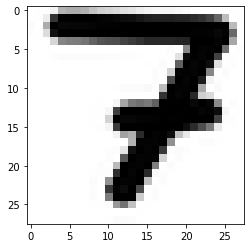

In [10]:

plt.imshow(im, cmap='gray')
plt.show()